# Happiness Prediction
- In this project, we will predict which countries or regions of the world will rise or fall in happiness based on factors such as GDP, freedom, and trust in government. We will use 
- How is this data collected? How is the happiness score calculated? 

In [257]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import geopandas as gp
from mpl_toolkits import mplot3d # for scatter plots
from mpl_toolkits.axes_grid1 import make_axes_locatable # for axes and legend alignment
%matplotlib inline

# EDA/Prep
- read in from 2015-2019
- put them all in the same dataframe with a year as a label 

In [173]:
df2015 = pd.read_csv('world_happiness/2015.csv')
df2016 = pd.read_csv('world_happiness/2016.csv')
df2017 = pd.read_csv('world_happiness/2017.csv')
df2018 = pd.read_csv('world_happiness/2018.csv')
df2019 = pd.read_csv('world_happiness/2019.csv')
df2020 = pd.read_csv('world_happiness/2020.csv')
df2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


### preprocessing notes
- country / region in 2015 and 2016 can be joined. 2017 has just country 
- 2015/2016 have similar formats
- <b>should check out 2020 report</b>

In [136]:
# to stay loyal to country or region, we only use region if there is no country provided 
# 2017 does not provide a region
print("Number of missing countries in 2015: ", df2015.Country.isna().sum())
print("Number of missing countries in 2016: ", df2016.Country.isna().sum())
df2015 = df2015.drop(columns=['Region'])
df2016 = df2016.drop(columns=['Region'])

Number of missing countries in 2015:  0
Number of missing countries in 2016:  0


In [137]:
# renaming stuff
df2015 = df2015.rename({'Happiness Rank': 'Overall rank', 'Happiness Score': 'Score',
                       'Economy (GDP per Capita)':'GDP per capita', 'Health (Life Expectancy)': 'Healthy life expectancy', 
                       'Trust (Government Corruption)' : 'Perceptions of corruption', 
                        'Country' : 'Country or region'}, axis='columns')
df2016 = df2016.rename({'Happiness Rank': 'Overall rank', 'Happiness Score': 'Score',
                       'Economy (GDP per Capita)':'GDP per capita', 'Health (Life Expectancy)': 'Healthy life expectancy', 
                       'Trust (Government Corruption)' : 'Perceptions of corruption', 
                       'Country' : 'Country or region'}, axis='columns')
df2017 = df2017.rename({'Happiness.Rank': 'Overall rank', 'Happiness.Score' : 'Score', 
                       'Economy..GDP.per.Capita.' : 'GDP per capita', 'Health..Life.Expectancy.' : 'Healthy life expectancy',
                       'Trust..Government.Corruption.': 'Perceptions of corruption', 
                       'Country' : 'Country or region'}, axis='columns')
df2018 = df2018.rename({'Freedom to make life choices': 'Freedom'}, axis='columns')
df2019 = df2019.rename({'Freedom to make life choices': 'Freedom'}, axis='columns')

### see if we can preserve the error metrics from 2015-2017
- <b>2015-2016</b>
    - Standard Error, Dystopia Residual, Lower Confidence Level
- <b>2017</b>
    - Whisker.high, Whisker.low, Dystopia.Residual

In [138]:
# dropping stuff 
df2015 = df2015.drop(columns=['Standard Error', 'Dystopia Residual'])
df2016 = df2016.drop(columns=['Dystopia Residual', 'Lower Confidence Interval', 'Upper Confidence Interval'])
df2017 = df2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'])

In [139]:
# check if they're all the same columns 
print("2015 columns: ", df2015.columns)
print("2016 columns: ", df2016.columns)
print("2017 columns: ", df2017.columns)
print("2018 columns: ", df2018.columns) # 2018, 2019 have the same column names
print("2019 columns: ", df2019.columns)

2015 columns:  Index(['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Family', 'Healthy life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')
2016 columns:  Index(['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Family', 'Healthy life expectancy', 'Freedom',
       'Perceptions of corruption', 'Generosity'],
      dtype='object')
2017 columns:  Index(['Country or region', 'Overall rank', 'Score', 'GDP per capita',
       'Family', 'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
2018 columns:  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')
2019 columns:  Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy'

## Initial visualizations
- [Data Visualization: How To Plot A Map with Geopandas in Python?
](https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b)

In [235]:
country_by_score = {}
score_2020 = df2020['Ladder score']
countries_2020 = df2020['Country name']
# print(countries_2020)
# print(sorted(countries_2020.tolist()))
sorted_countries_2020 = sorted(countries_2020.tolist())
df = pd.DataFrame({'name': countries_2020, 'score': score_2020})
df
# for i in range(len(countries_2020)):
#     country_by_score[countries_2020[i]] = score_2020[i]

,name,score
0,Afghanistan,7.8087
1,Albania,7.6456
2,Algeria,7.5599
3,Argentina,7.5045
4,Armenia,7.4880
...,...,...
148,Venezuela,3.4759
149,Vietnam,3.3123
150,Yemen,3.2992
151,Zambia,2.8166


In [243]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))
# print(sorted(world['name'].tolist()))
sorted_world_countries = sorted(world['name'].tolist())
ct = 0
for c in sorted_countries_2020:
#     print(c, 'in world: ', c in sorted_world_countries)
    if (c not in sorted_world_countries):
        print(c)
        ct += 1

Bahrain
Bosnia and Herzegovina
Central African Republic
Comoros
Congo (Brazzaville)
Congo (Kinshasa)
Czech Republic
Dominican Republic
Hong Kong S.A.R. of China
Ivory Coast
Maldives
Malta
Mauritius
North Cyprus
Palestinian Territories
Singapore
South Sudan
Swaziland
Taiwan Province of China
United States


In [249]:
# merge world and 2020 df scores 
merge = pd.merge(world, df, on='name', how='left')
merge

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,score
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",4.1872
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",6.6638
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",4.6236
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",5.1239
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",5.5557
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",4.1514


<class 'matplotlib.figure.Figure'>


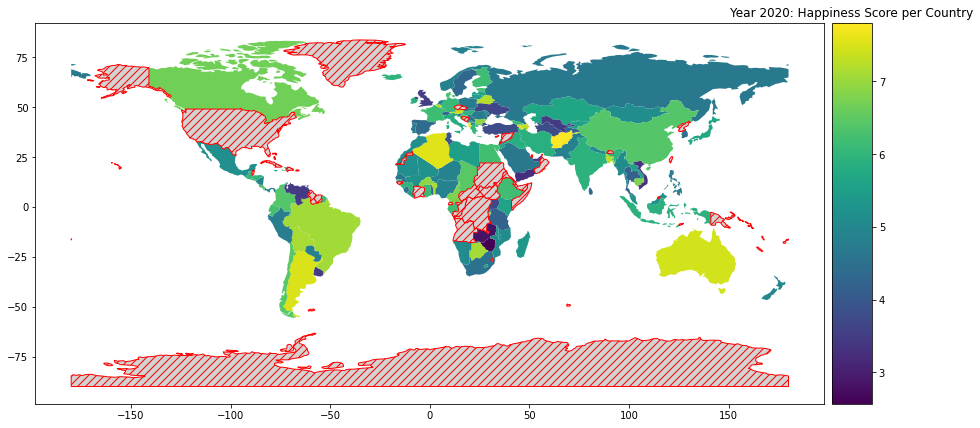

In [283]:
# plot the happiness score of each country on this map
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15, 20)
print(type(fig))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.title('Year 2020: Happiness Score per Country')
merge.plot(column='score',legend=True, ax=ax, cax=cax, missing_kwds={
                                                       "color": "lightgrey",
                                                       "edgecolor": "red",
                                                       "hatch": "///",
                                                       "label": "Missing values", },)
plt.show()

In [140]:
# preprocess 2020 a little differently
# df2020.columns
df2020 = df2020.drop(columns=['Regional indicator',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia', 'Dystopia + residual'])
df2020

,Country name,Ladder score,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
...,...,...,...,...,...,...,...,...
148,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265
149,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
150,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
151,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157


In [141]:
# df2020.insert(loc=1, column='Overall Rank', value=np.arange(1, 154)) # rank of 2020 countries 
# df2020

In [142]:
df2020 = df2020.rename({'Country name' : 'Country or region', 'Ladder score' : 'Score', 
                                      'Explained by: Log GDP per capita': 'GDP per capita', 
                                      'Explained by: Social support' : 'Social support', 
                                      'Explained by: Healthy life expectancy' : 'Healthy life expectancy', 
                                      'Explained by: Freedom to make life choices': 'Freedom', 
                                      'Explained by: Generosity' : 'Generosity',
                                      'Explained by: Perceptions of corruption' : 'Perceptions of corruption'},
                                      axis='columns')
df2020

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857
1,Denmark,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260
2,Switzerland,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946
3,Iceland,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541
4,Norway,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101
...,...,...,...,...,...,...,...,...
148,Central African Republic,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265
149,Rwanda,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542
150,Zimbabwe,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929
151,South Sudan,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157


In [143]:
df2020.columns

Index(['Country or region', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [144]:
df2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [145]:
# columns are still out of order
# next, will drop countries that are not in 2020
target_countries = df2020['Country or region'].to_numpy()
c_2015 = df2015['Country or region']
c_2016 = df2016['Country or region']
c_2017 = df2017['Country or region']
c_2018 = df2018['Country or region']
c_2019 = df2019['Country or region']
countries = [c_2015, c_2016, c_2017, c_2018, c_2019]

In [148]:
years = [2015, 2016, 2017, 2018, 2019, 2020]
dfs = [df2015, df2016, df2017, df2018, df2019, df2020]
for i in range(len(dfs)):
    dfs[i].insert(loc=0, column='year', value=years[i])

In [155]:
df = pd.concat(dfs, join='inner')
df

,year,Country or region,Score,GDP per capita,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
0,2015,Switzerland,7.5870,1.396510,0.941430,0.665570,0.419780,0.296780
1,2015,Iceland,7.5610,1.302320,0.947840,0.628770,0.141450,0.436300
2,2015,Denmark,7.5270,1.325480,0.874640,0.649380,0.483570,0.341390
3,2015,Norway,7.5220,1.459000,0.885210,0.669730,0.365030,0.346990
4,2015,Canada,7.4270,1.326290,0.905630,0.632970,0.329570,0.458110
...,...,...,...,...,...,...,...,...
148,2020,Central African Republic,3.4759,0.041072,0.000000,0.292814,0.028265,0.253513
149,2020,Rwanda,3.3123,0.343243,0.572383,0.604088,0.485542,0.235705
150,2020,Zimbabwe,3.2992,0.425564,0.375038,0.377405,0.080929,0.151349
151,2020,South Sudan,2.8166,0.289083,0.208809,0.065609,0.111157,0.209935


In [156]:
len(df['Country or region'].unique())

172